In [11]:
import os
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

from pandarallel import pandarallel
pandarallel.initialize(os.cpu_count()-1, progress_bar=True)

INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [12]:
data = pd.read_csv('./dataset/5.Funnel_Analysis/user_table.csv')
home = pd.read_csv('./dataset/5.Funnel_Analysis/home_page_table.csv')
search = pd.read_csv('./dataset/5.Funnel_Analysis/search_page_table.csv')
payment = pd.read_csv('./dataset/5.Funnel_Analysis/payment_page_table.csv')
confirmation = pd.read_csv('./dataset/5.Funnel_Analysis/payment_confirmation_table.csv')

In [23]:
data['date'] = pd.to_datetime(data['date'])

In [13]:
data['home'] = data['user_id'].isin(home['user_id'])
data['search'] = data['user_id'].isin(search['user_id'])
data['payment'] = data['user_id'].isin(payment['user_id'])
data['confirmation'] = data['user_id'].isin(confirmation['user_id'])

In [14]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       90400 non-null  int64 
 1   date          90400 non-null  object
 2   device        90400 non-null  object
 3   sex           90400 non-null  object
 4   home          90400 non-null  bool  
 5   search        90400 non-null  bool  
 6   payment       90400 non-null  bool  
 7   confirmation  90400 non-null  bool  
dtypes: bool(4), int64(1), object(3)
memory usage: 3.1+ MB


,user_id,date,device,sex,home,search,payment,confirmation
0,450007,2015-02-28,Desktop,Female,True,False,False,False
1,756838,2015-01-13,Desktop,Male,True,False,False,False
2,568983,2015-04-09,Desktop,Male,True,True,False,False
3,190794,2015-02-18,Desktop,Female,True,True,False,False
4,537909,2015-01-15,Desktop,Male,True,False,False,False


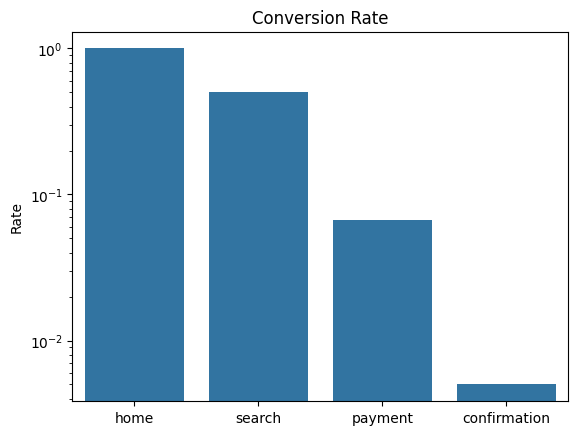

In [21]:
home_rate = data['home'].mean()
search_rate = data['search'].mean()
payment_rate = data['payment'].mean()
confirmation_rate = data['confirmation'].mean()

# plot
fig, ax = plt.subplots()
sns.barplot(x=['home', 'search', 'payment', 'confirmation'], y=[home_rate, search_rate, payment_rate, confirmation_rate], ax=ax)
ax.set_ylabel('Rate')
ax.set_title('Conversion Rate')
ax.set_yscale('log')
plt.show()

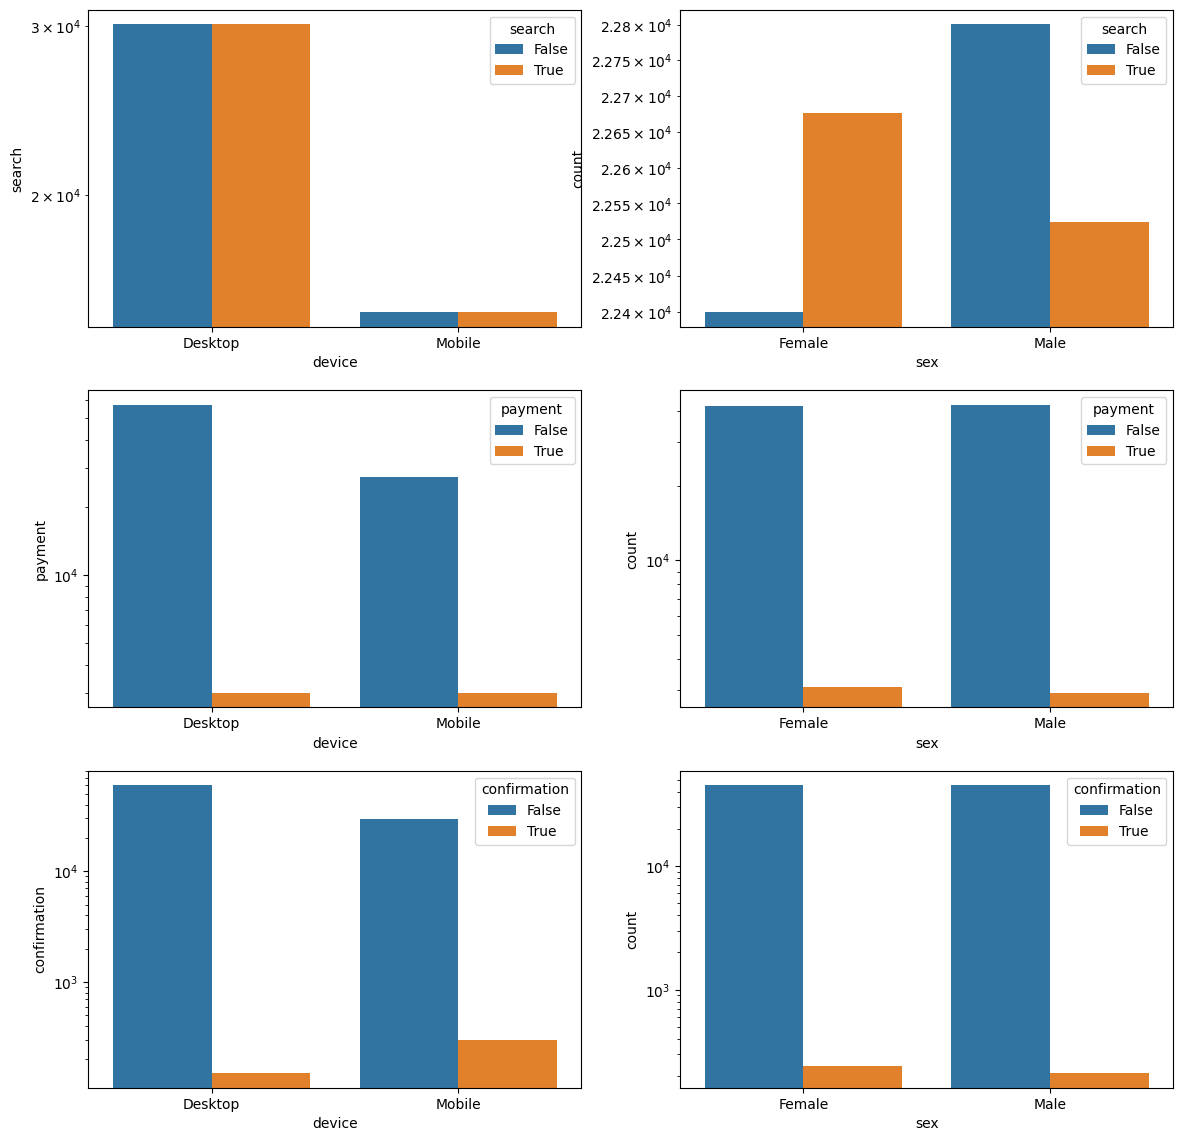

In [36]:
fig, ax = plt.subplots(3, 2, figsize=(14, 14))
sns.countplot(x='device', hue='search', data=data, ax=ax[0, 0])
sns.countplot(x='sex', hue='search', data=data, ax=ax[0, 1])
sns.countplot(x='device', hue='payment', data=data, ax=ax[1, 0])
sns.countplot(x='sex', hue='payment', data=data, ax=ax[1, 1])
sns.countplot(x='device', hue='confirmation', data=data, ax=ax[2, 0])
sns.countplot(x='sex', hue='confirmation', data=data, ax=ax[2, 1])
ax[0, 0].set_ylabel('search')
ax[1, 0].set_ylabel('payment')
ax[2, 0].set_ylabel('confirmation')
plt.setp(ax, yscale='log');

- sex is uniform
- mobile has significantly higher rate than desktop -> see if desktop has anything discourage users to proceed

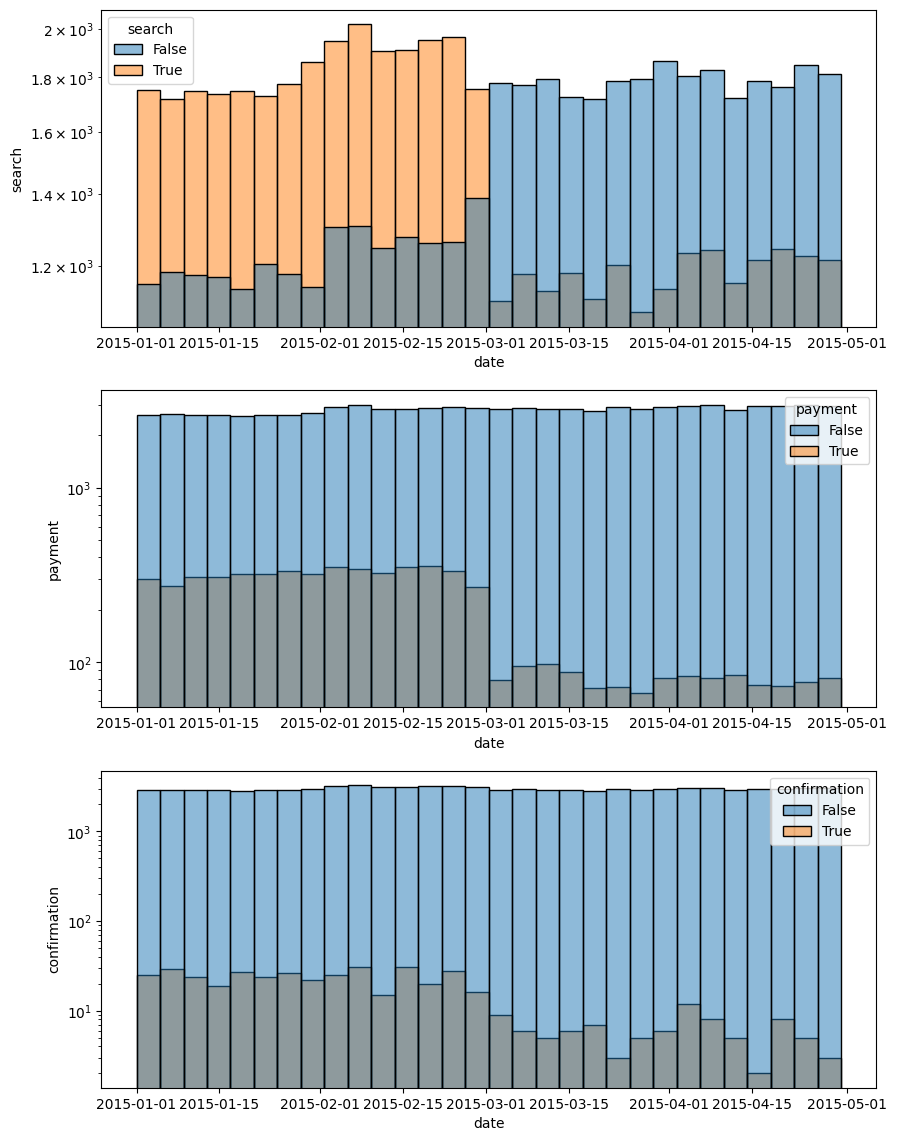

In [40]:
fig, ax = plt.subplots(3, 1, figsize=(10, 14))
sns.histplot(data=data, x='date', hue='search', bins=30, ax=ax[0])
sns.histplot(data=data, x='date', hue='payment', bins=30, ax=ax[1])
sns.histplot(data=data, x='date', hue='confirmation', bins=30, ax=ax[2])
ax[0].set_ylabel('search')
ax[1].set_ylabel('payment')
ax[2].set_ylabel('confirmation')
plt.setp(ax, yscale='log');

The data ranges from 2015-03-01 to 2015-04-30
- Something strange (or special) happened on 2015-03-01, rate was high before this date, but drop a lot afterwards. Perhaps seasoning sale?

In [52]:
data['weekday'] = data['date'].dt.weekday

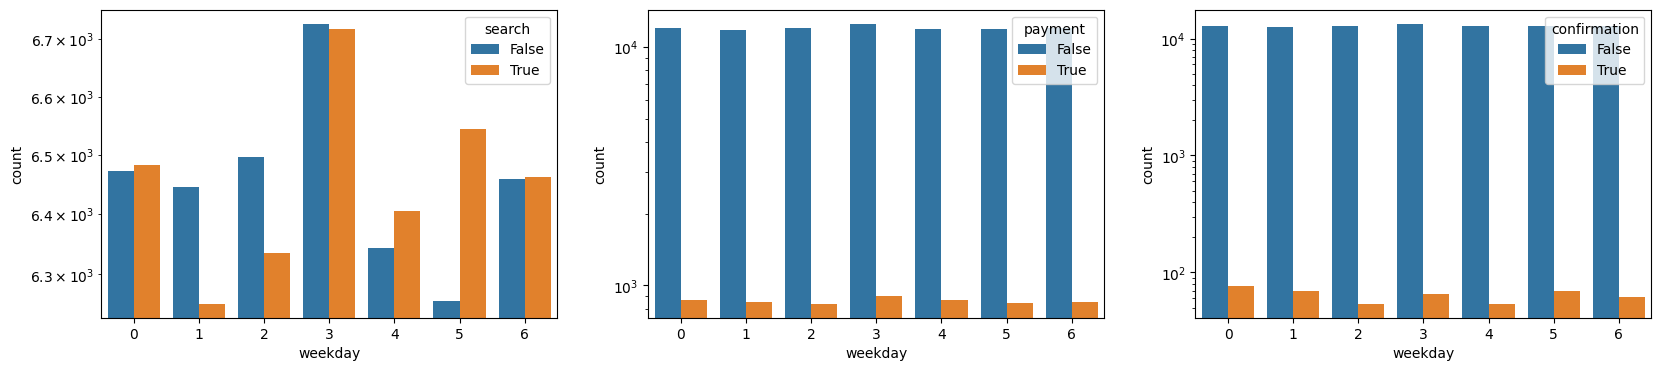

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 4))
sns.countplot(x='weekday', hue='search', data=data, ax=ax[0])
sns.countplot(x='weekday', hue='payment', data=data, ax=ax[1])
sns.countplot(x='weekday', hue='confirmation', data=data, ax=ax[2])
plt.setp(ax, yscale='log');
# Monday=0, Sunday=6

- payment and confirmation are uniform across weekday
- search tends to have higher rate on Fri, Sat. and lower rate on Tue, Wed. and 50/50 on Mon, Thu